In [1]:
import numpy as np
import matplotlib.pyplot as plt

from optionsdata import OptionsData
from blackScholes import implied_volatility, black_scholes_call, black_scholes_put
from callOption import CallOption
from putOption import PutOption
from optionGreekPlotter import OptionGreekPlotter

# Call and Put pricing

In [2]:
Ticker ="AAPL"

In [5]:
options = OptionsData(Ticker, extract_date = "01/16/2025")
options.load_data()
options.process_data(interest_rate=0.042)

Data loaded successfully!


d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\optionsdata.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data['implied_volatility'] = call_data.apply(lambda row: implied_volatility(
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\optionsdata.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  put_data['implied_volatility'] = put_data.apply(lambda row: implied_volatility(


In [6]:
options_df_filtered = options.implied_volatility

In [7]:
options_df_filtered.describe()

,strike,maturity,lastPrice,volume,implied_volatility
count,721.000000,721.000000,721.000000,721.000000,654.000000
mean,207.236477,0.573268,20.758946,732.611650,0.414645
std,81.286850,0.590032,42.088164,3495.769013,0.411265
min,5.000000,0.002740,0.010000,10.000000,0.168675
25%,160.000000,0.098630,0.280000,22.000000,0.227063
50%,217.500000,0.424658,2.870000,64.000000,0.275443
75%,260.000000,0.923288,14.750000,271.000000,0.408942
max,450.000000,1.997260,249.300000,63913.000000,4.135772


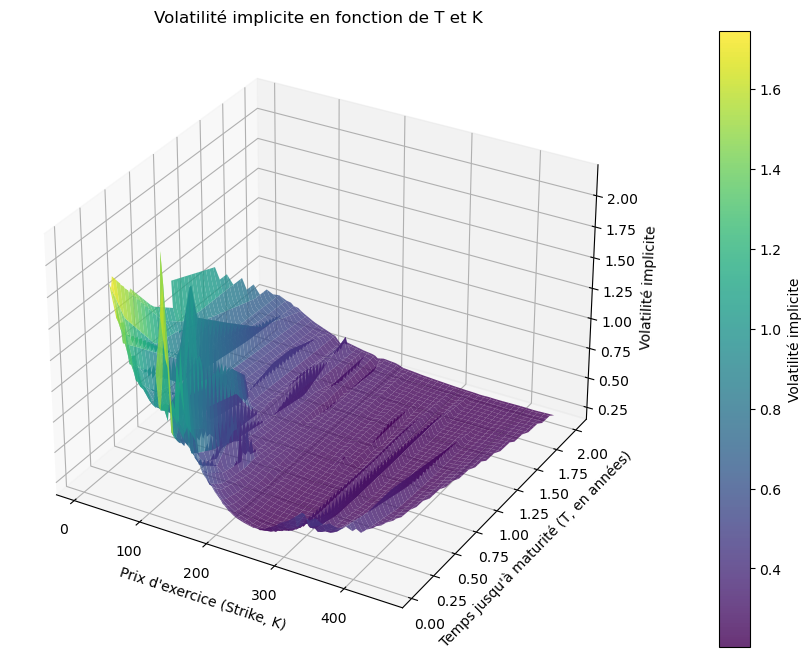

In [8]:
options.implied_volatility_plot()

In [9]:
sigma, stock = options.sigma_sim(T=1.5, K=100)
interest_rate = 0.042
call_option = CallOption(10, 2, stock, interest_rate, sigma)
put_option = PutOption(10, 2, stock, interest_rate, sigma)
call_option.rho()
put_option.rho()

-8.083440246134093e-07

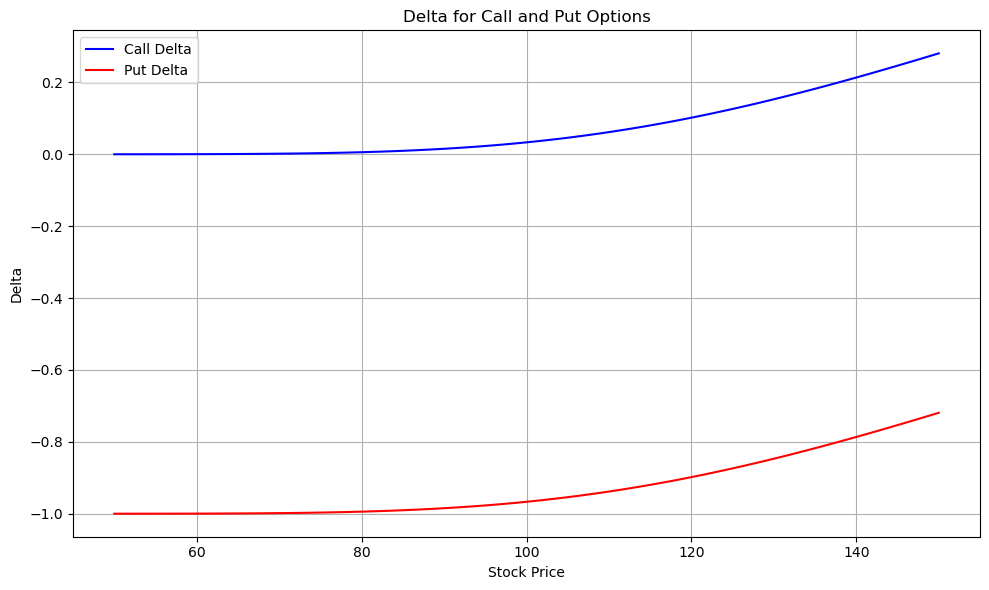

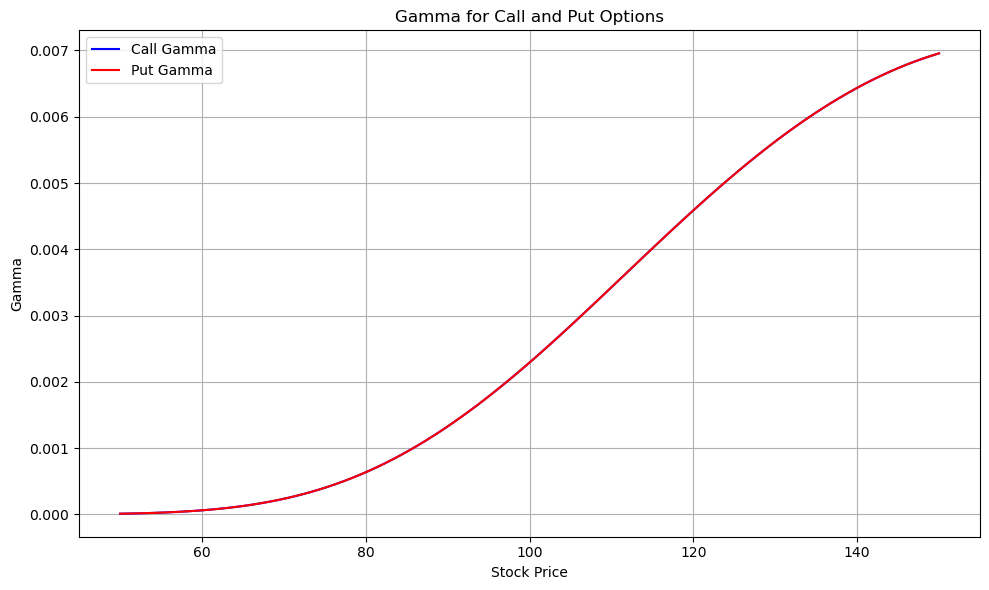

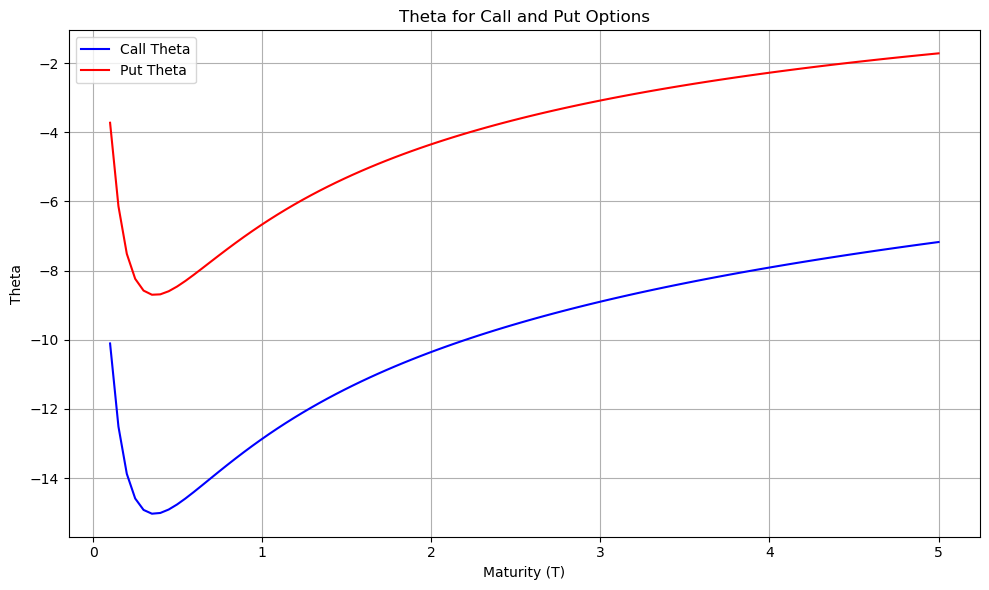

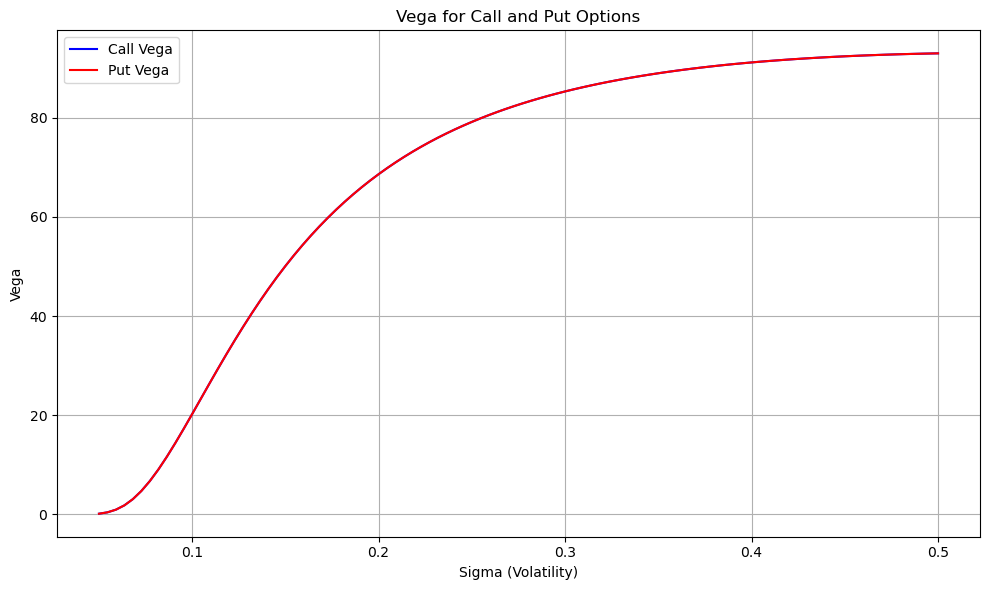

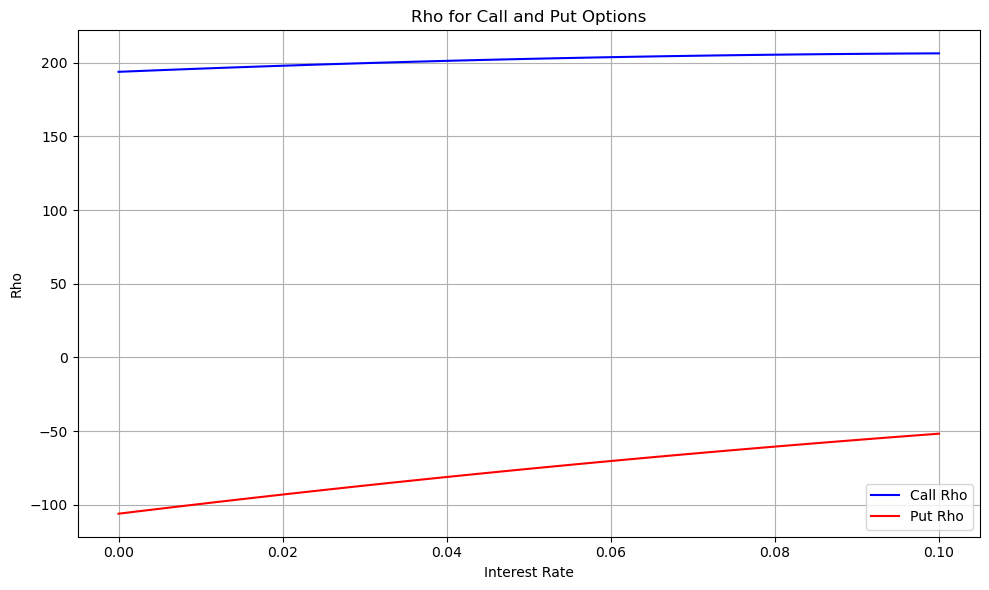

In [10]:
# Example of usage
if __name__ == "__main__":
    # Define option parameters
    K = 200
    T = 1.5
    sigma, stock = options.sigma_sim(T, K)
    interest_rate = 0.032

    # Create the plotter instance
    plotter = OptionGreekPlotter(K, T, stock, sigma, interest_rate)

    # Functions for each Greek
    def delta(option):
        return option.delta()

    def gamma(option):
        return option.gamma()

    def theta(option):
        return option.theta()

    def vega(option):
        return option.vega()

    def rho(option):
        return option.rho()

    # Plot Delta vs Stock Prices
    stock_prices = np.linspace(50, 150, 100)
    plotter.plot_greek(delta, stock_prices, "Stock Price", "Delta", "Delta for Call and Put Options")

    # Plot Gamma vs Stock Prices
    plotter.plot_greek(gamma, stock_prices, "Stock Price", "Gamma", "Gamma for Call and Put Options")

    # Plot Theta vs Maturities
    maturities = np.linspace(0.1, 5, 100)
    plotter.plot_greek(theta, maturities, "Maturity (T)", "Theta", "Theta for Call and Put Options")

    # Plot Vega vs Volatility
    volatilities = np.linspace(0.05, 0.5, 100)
    plotter.plot_greek(vega, volatilities, "Sigma (Volatility)", "Vega", "Vega for Call and Put Options")

    # Plot Rho vs Interest Rates
    interest_rates = np.linspace(0.0, 0.1, 100)
    plotter.plot_greek(rho, interest_rates, "Interest Rate", "Rho", "Rho for Call and Put Options")

# US Bond Pricing

In [11]:
#%pip install fredapi
#%pip install nelson_siegel_svensson
#%pip install datetime

In [1]:
from bond import*
from riskFree import*
from swap import*
import datetime

In [2]:
api_key = '99b15e0a2f3b3f4571893e831fd555d0'
start = "2025-01-01"
end = datetime.date.today()
today = "2025-01-10" #datetime.date.today()

# French Zero-coupon rate
taux_zc_fr = RiskFree()
taux_zc_fr.get_country('fr')
taux_zc_fr.get_riskFree_fr()

# US Zero-coupon rate
taux_zc_usa = RiskFree()
taux_zc_usa.get_country('usa')
taux_zc_usa.get_riskFree_usa(api_key)

In [3]:
bond_fr = Bond()
bond_fr.get_country('fr')
bond_fr.get_riskFree_rate(riskFree=taux_zc_fr)


bond_usa = Bond()
bond_usa.get_country('usa')
bond_usa.get_riskFree_rate(riskFree=taux_zc_usa)

In [4]:
bond_fr.get_price(face_value=1000, coupon_rate=.0, maturity=2, freq=1)

942.0979496881404

In [5]:
swap_fr = Swap()
swap_fr.get_country('fr')
swap_fr.get_riskFree_rate(riskFree=taux_zc_fr)

swap_usa = Swap()
swap_usa.get_country('usa')
swap_usa.get_riskFree_rate(riskFree=taux_zc_usa)

In [6]:
bond_fr.get_price(face_value=1000, coupon_rate=.0, maturity=2, freq=2)
print(f"French Gov Bond: {bond_fr.price:,.2f} euros") # assuming a notional in euros

French Gov Bond: 942.91 euros


In [7]:
bond_usa.get_price(face_value=1000, coupon_rate=.0, maturity=2, freq=2)
# Calculate the swap value
print(f"Treasury bond: ${bond_usa.price:,.2f}") # assuming a notional in dollars

Treasury bond: $919.89


# Swap

In [8]:
# Example data
t = 0  # Current time
T = np.array([1, 2, 3, 4, 5])  # Payment times in years
N = 1000000  # Notional amount
K = 0.02  # Fixed swap rate (4%)

# Calculate the swap value
print(f"Swap Value on USA risk free rate: ${swap_usa.swap(t, T, N, K):,.2f}") # assuming a notional in dollars
print(f"Swap Value on French risk free rate: {swap_fr.swap(t, T, N, K):,.2f} euros") # assuming a notional in euros


Swap Value on USA risk free rate: $112,684.10
Swap Value on French risk free rate: 1,524.43 euros


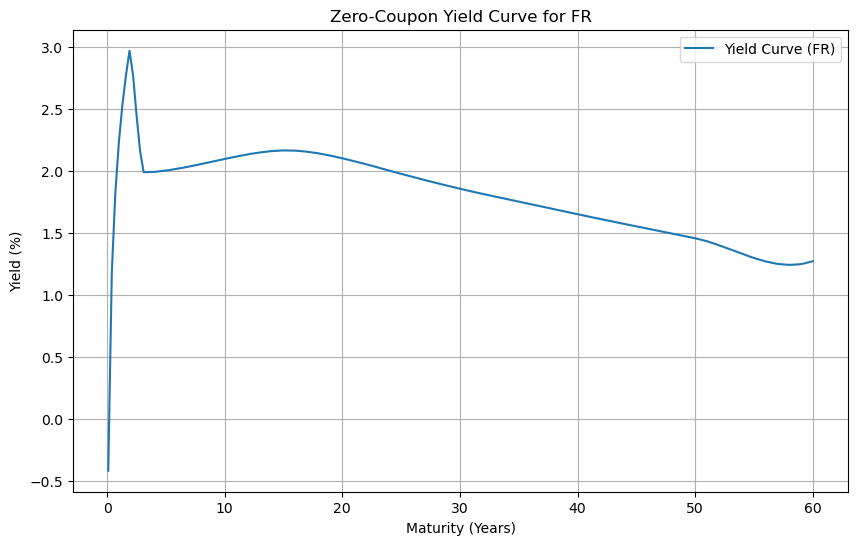

In [9]:
taux_zc_fr.yield_curve_plot()


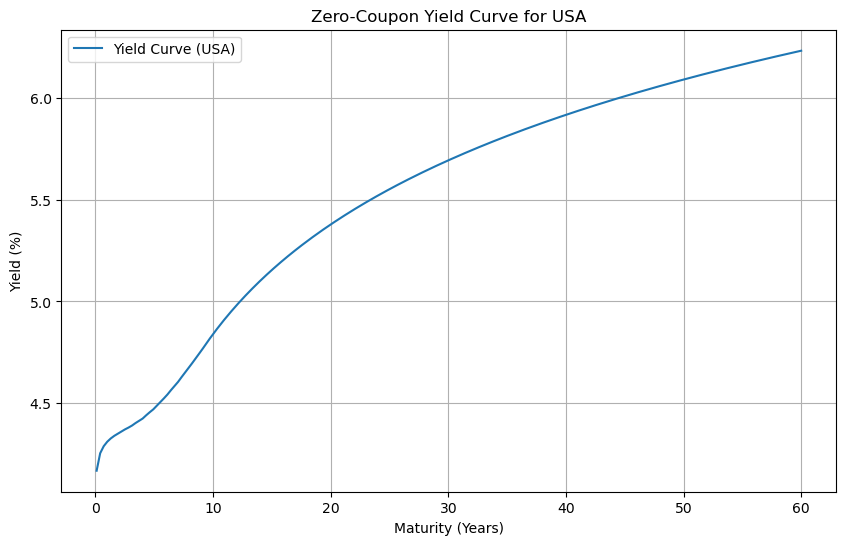

In [10]:
taux_zc_usa.yield_curve_plot()

In [11]:
import plotly.graph_objects as go
import numpy as np

def plot_bond_price():
    face_value = 1000  # Fixed face value
    freq = 0.5  # Semi-annual payments
    coupon_rates = np.linspace(0, 0.1, 50)  # Coupon rates from 0% to 10%
    maturities = np.linspace(1, 30, 50)  # Maturities from 1 to 30 years

    # Create a grid of coupon rates and maturities
    X, Y = np.meshgrid(coupon_rates, maturities)
    Z = np.zeros_like(X)

    # Initialize a Bond object
    bond = Bond()
    bond.get_country("usa")
    bond.get_riskFree_rate(taux_zc_usa)  # Assume you have initialized the riskFree object

    # Calculate bond prices
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = bond.get_price(face_value, X[i, j], Y[i, j], freq=freq)

    # Create the 3D surface plot
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale="Viridis")])
    fig.update_layout(
        title="Bond Price vs. Coupon Rate and Maturity",
        scene=dict(
            xaxis_title="Coupon Rate",
            yaxis_title="Maturity (Years)",
            zaxis_title="Bond Price",
        ),
    )
    fig.show()

# Call the function
plot_bond_price()
